epoch=0
0 13 1.0578437613443874
epoch=1
1 27 1.019072668246042
epoch=2
2 41 0.9823113366454053
epoch=3
3 55 0.9486441407698666
epoch=4
4 69 0.9177387603308461
epoch=5
5 83 0.8874848827040192
epoch=6
6 97 0.8589846701067348
epoch=7
7 111 0.8330464378250614
epoch=8
8 125 0.8075432552516316
epoch=9
9 139 0.7835007937603431
epoch=10
10 153 0.7612071737805477
epoch=11
11 167 0.7401636813138347
epoch=12
12 181 0.7204463367901175
epoch=13
13 195 0.7016039836999314
epoch=14
14 209 0.6837047402302424
epoch=15
15 223 0.6668641430678575
epoch=16
16 237 0.6509321429544839
epoch=17
17 251 0.635580614032953
epoch=18
18 265 0.6210977147384099
epoch=19
19 279 0.6072021851218722
epoch=20
20 293 0.5941453506638481
epoch=21
21 307 0.5816752062626719
epoch=22
22 321 0.5697930993516666
epoch=23
23 335 0.5584841528023691
epoch=24
24 349 0.5478355658010842
epoch=25
25 363 0.5374357889840674
epoch=26
26 377 0.5275040999131513
epoch=27
27 391 0.5180360969397501
epoch=28
28 405 0.508976994677848
epoch=29
29 419

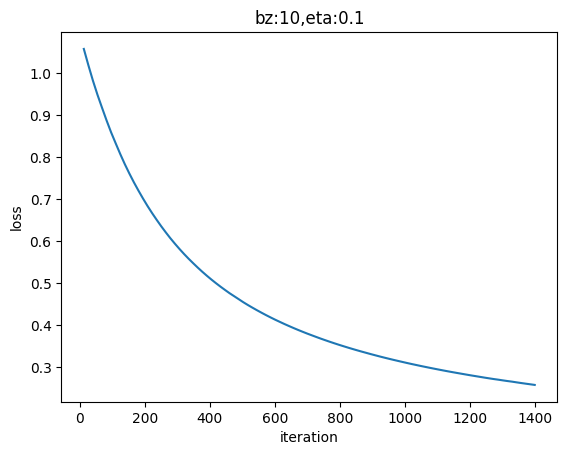

W= [[-1.73613959 -3.23697605  4.97311564]
 [ 4.76259454 -3.19132854 -1.57126601]]
B= [[-1.69234807  3.52499252 -1.83264445]]
output= [[0.01799834 0.74638405 0.23561761]
 [0.27337993 0.14922927 0.5773908 ]
 [0.43952624 0.3265831  0.23389066]
 [0.63964737 0.33766619 0.02268645]]
r= [2 3 1 1]


In [1]:
import numpy as np
from HelperClass.NeuralNet_1_2 import *
file_name = "ch07.npz"

def inference(net, reader):
    xt_raw = np.array([5,1,7,6,5,6,2,7]).reshape(4,2)
    xt = reader.NormalizePredicateData(xt_raw)
    output = net.inference(xt)
    r = np.argmax(output, axis=1)+1
    print("output=", output)
    print("r=", r)

# 主程序
if __name__ == '__main__':
    num_category = 3
    reader = DataReader_1_3(file_name)
    reader.ReadData()
    reader.NormalizeX()
    reader.ToOneHot(num_category, base=1)

    num_input = 2
    params = HyperParameters_1_1(num_input, num_category, eta=0.1, max_epoch=100, batch_size=10, eps=1e-3, net_type=NetType.MultipleClassifier)
    net = NeuralNet_1_2(params)
    net.train(reader, checkpoint=1)

    inference(net, reader)